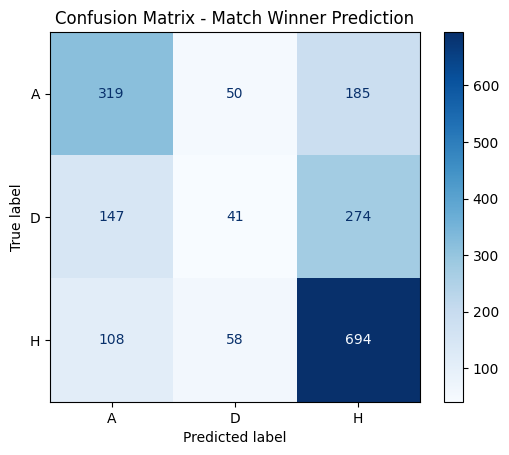

Model Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

           A       0.56      0.58      0.57       554
           D       0.28      0.09      0.13       462
           H       0.60      0.81      0.69       860

    accuracy                           0.56      1876
   macro avg       0.48      0.49      0.46      1876
weighted avg       0.51      0.56      0.52      1876


Feature Importance Ranking:
1. HomeShotsOnTarget: 0.1078
2. HomeTeam: 0.0967
3. AwayTeam: 0.0963
4. AwayShotsOnTarget: 0.0924
5. HomeShots: 0.0853
6. AwayShots: 0.0845
7. AwayFouls: 0.0828
8. HomeFouls: 0.0816
9. HomeCorners: 0.0772
10. AwayCorners: 0.0722
11. AwayYellowCards: 0.0522
12. HomeYellowCards: 0.0500
13. HomeRedCards: 0.0107
14. AwayRedCards: 0.0101


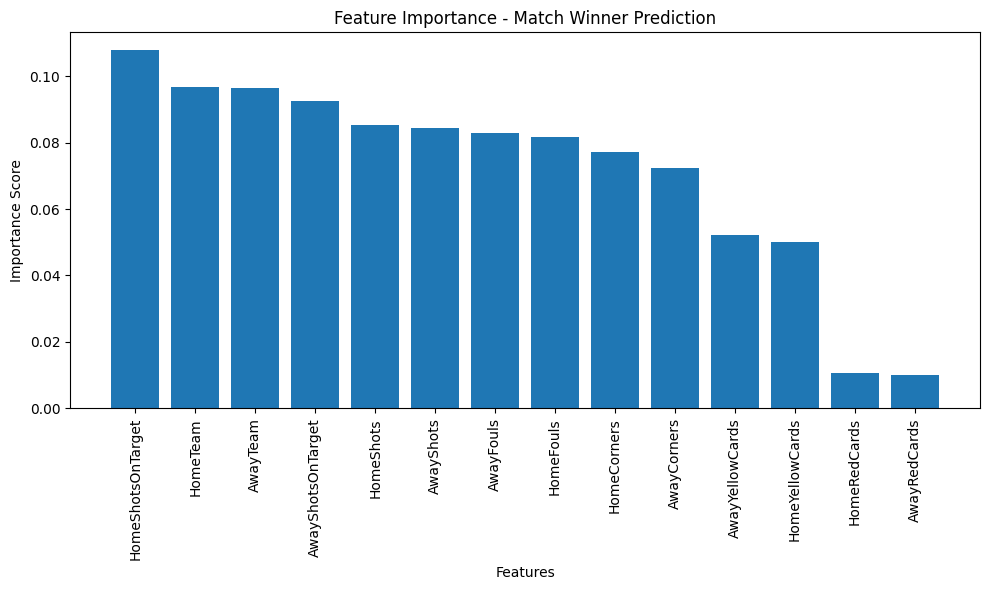

In [12]:
# ===============================
# Match Winner Prediction + Feature Importance
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report
)

# 1. Load dataset
file_path = "/content/every_match.csv"   # <-- update if needed
df = pd.read_csv(file_path)

# 2. Target column
y = df["FullTimeResult"]

# 3. Drop ONLY the real leakage columns
leakage_cols = [
    "FullTimeHomeGoals", "FullTimeAwayGoals",
    "HalfTimeHomeGoals", "HalfTimeAwayGoals", "HalfTimeResult"
]
X = df.drop(columns=["Season", "MatchDate", "FullTimeResult"] + leakage_cols)

# 4. Encode categorical features (teams)
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 7. Predictions
y_pred = clf.predict(X_test)

# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Match Winner Prediction")
plt.show()

# 9. Accuracy & Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10. Feature Importance
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Print ranking
print("\nFeature Importance Ranking:")
for i in range(len(features)):
    print(f"{i+1}. {features[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot graph
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("Feature Importance - Match Winner Prediction")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
